In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
import json
import os
from pathlib import Path

In [2]:
# Загрузка данных и первичный анализ для датасета 01
df1 = pd.read_csv('data/S07-hw-dataset-01.csv')

print("\nПервые 5 строк:")
print(df1.head())

print("\nИнформация о данных:")
print(df1.info())

print("\nБазовые статистики:")
print(df1.describe())

print("\nПроверка пропусков:")
print(df1.isnull().sum())

# Определение признаков и sample_id
sample_id1 = df1['sample_id']
X1 = df1.drop('sample_id', axis=1)

print(f"\nРазмерность данных: {X1.shape}")
print("Типы признаков:")
print(X1.dtypes.value_counts())


Первые 5 строк:
   sample_id        f01        f02       f03         f04        f05  \
0          0  -0.536647 -69.812900 -0.002657   71.743147 -11.396498   
1          1  15.230731  52.727216 -1.273634 -104.123302  11.589643   
2          2  18.542693  77.317150 -1.321686 -111.946636  10.254346   
3          3 -12.538905 -41.709458  0.146474   16.322124   1.391137   
4          4  -6.903056  61.833444 -0.022466  -42.631335   3.107154   

         f06        f07       f08  
0 -12.291287  -6.836847 -0.504094  
1  34.316967 -49.468873  0.390356  
2  25.892951  44.595250  0.325893  
3   2.014316 -39.930582  0.139297  
4  -5.471054   7.001149  0.131213  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03  

In [3]:
# Загрузка данных и первичный анализ для датасета 02
df2 = pd.read_csv('data/S07-hw-dataset-02.csv')

print("\nПервые 5 строк:")
print(df2.head())

print("\nИнформация о данных:")
print(df2.info())

print("\nБазовые статистики:")
print(df2.describe())

print("\nПроверка пропусков:")
print(df2.isnull().sum())

# Определение признаков и sample_id
sample_id2 = df2['sample_id']
X2 = df2.drop('sample_id', axis=1)

print(f"\nРазмерность данных: {X2.shape}")
print("Типы признаков:")
print(X2.dtypes.value_counts())


Первые 5 строк:
   sample_id        x1        x2    z_noise
0          0  0.098849 -1.846034  21.288122
1          1 -1.024516  1.829616   6.072952
2          2 -1.094178 -0.158545 -18.938342
3          3 -1.612808 -1.565844 -11.629462
4          4  1.659901 -2.133292   1.895472

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB
None

Базовые статистики:
        sample_id           x1           x2      z_noise
count  8000.00000  8000.000000  8000.000000  8000.000000
mean   3999.50000     0.478867     0.241112     0.110454
std    2309.54541     0.955138     0.663195     8.097716
min       0.00000    -2.487352    -2.499237  

In [4]:
# Загрузка данных и первичный анализ для датасета 03
df3 = pd.read_csv('data/S07-hw-dataset-03.csv')

print("\nПервые 5 строк:")
print(df3.head())

print("\nИнформация о данных:")
print(df3.info())

print("\nБазовые статистики:")
print(df3.describe())

print("\nПроверка пропусков:")
print(df3.isnull().sum())

# Определение признаков и sample_id
sample_id3 = df3['sample_id']
X3 = df3.drop('sample_id', axis=1)

print(f"\nРазмерность данных: {X3.shape}")
print("Типы признаков:")
print(X3.dtypes.value_counts())


Первые 5 строк:
   sample_id        x1        x2    f_corr   f_noise
0          0 -2.710470  4.997107 -1.015703  0.718508
1          1  8.730238 -8.787416  3.953063 -1.105349
2          2 -1.079600 -2.558708  0.976628 -3.605776
3          3  6.854042  1.560181  1.760614 -1.230946
4          4  9.963812 -8.869921  2.966583  0.915899

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB
None

Базовые статистики:
          sample_id            x1            x2        f_corr       f_noise
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.000000
mean    7499.500000      

In [5]:
# Препроцессинг для всех датасетов

# Для датасета 01
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# Для датасета 02
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# Для датасета 03
scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

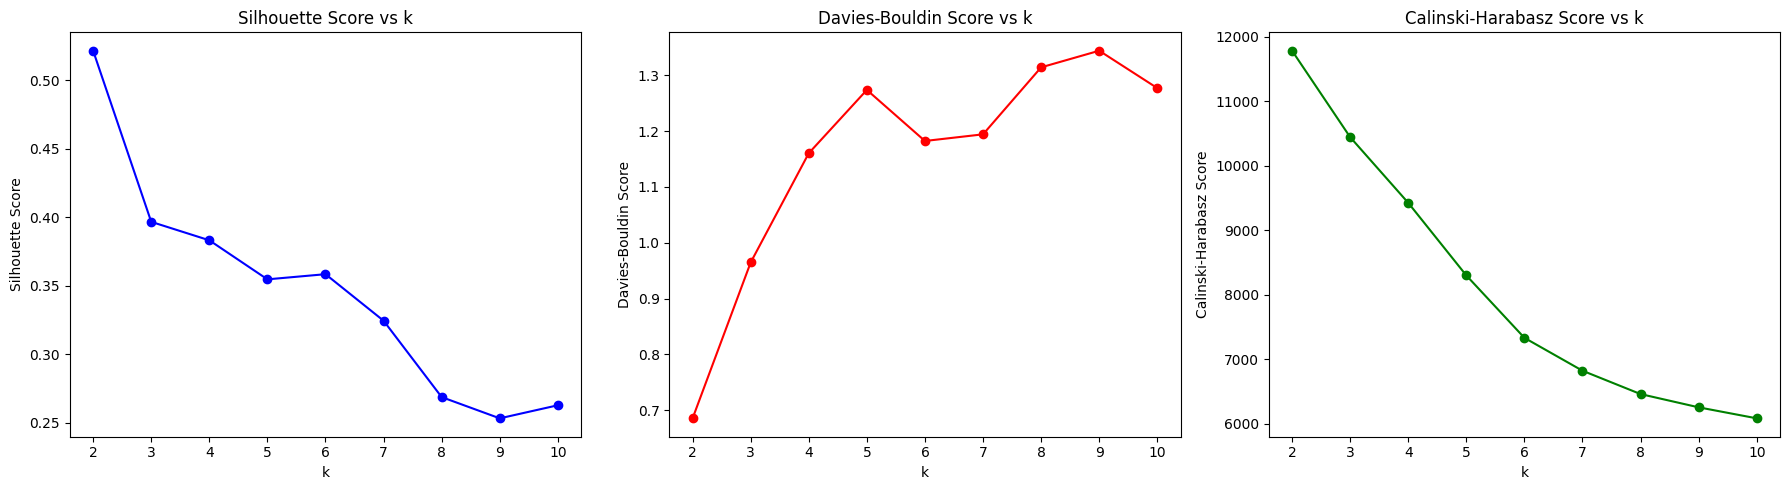

Оптимальное количество кластеров по Silhouette Score: k = 2
Лучшие параметры для DBSCAN: eps=0.6, min_samples=10, silhouette=0.3845
Доля шума в DBSCAN: 0.0192

Метрики KMeans:
{'silhouette': 0.5216395622404242, 'davies_bouldin': 0.6853295219054459, 'calinski_harabasz': 11786.95462267153}

Метрики DBSCAN (только для не-шумовых точек):
{'silhouette': 0.3845323404927463, 'davies_bouldin': 1.2397462212537893, 'calinski_harabasz': 8561.539180134101}

Лучшая модель для датасета 01: KMeans


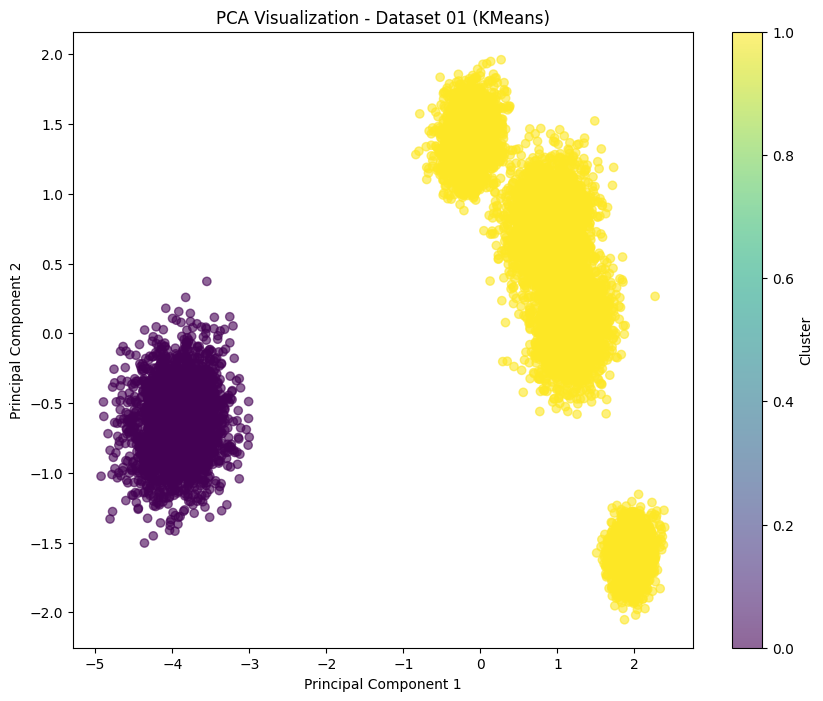

In [6]:
# Модели, метрики и визуализация для датасета 01

# Подбор k для KMeans
k_range = range(2, 11)
silhouette_scores = []
db_scores = []
ch_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X1_scaled)
    silhouette_scores.append(silhouette_score(X1_scaled, labels))
    db_scores.append(davies_bouldin_score(X1_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X1_scaled, labels))

# Визуализация метрик vs k
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].plot(k_range, silhouette_scores, 'bo-')
ax[0].set_title('Silhouette Score vs k')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Silhouette Score')

ax[1].plot(k_range, db_scores, 'ro-')
ax[1].set_title('Davies-Bouldin Score vs k')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Davies-Bouldin Score')

ax[2].plot(k_range, ch_scores, 'go-')
ax[2].set_title('Calinski-Harabasz Score vs k')
ax[2].set_xlabel('k')
ax[2].set_ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.savefig('artifacts/figures/dataset01_metrics_vs_k.png')
plt.show()

# Выбор оптимального k (максимум silhouette, минимум Davies-Bouldin, максимум Calinski-Harabasz)
optimal_k1 = k_range[np.argmax(silhouette_scores)]
print(f"Оптимальное количество кластеров по Silhouette Score: k = {optimal_k1}")

# Обучение KMeans с оптимальным k
kmeans1 = KMeans(n_clusters=optimal_k1, random_state=42, n_init=10)
labels_kmeans1 = kmeans1.fit_predict(X1_scaled)

# Применение DBSCAN
eps_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_samples_range = [3, 5, 10]

best_db_score = -1
best_eps1 = None
best_min_samples1 = None
best_dbscan_labels = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X1_scaled)
        
        # Пропускаем если все точки отнесены к шуму или только один кластер
        if len(set(labels)) <= 2:
            continue
            
        # Считаем метрики только для не-шумовых точек
        non_noise_mask = labels != -1
        if np.sum(non_noise_mask) > 0:
            sil_score = silhouette_score(X1_scaled[non_noise_mask], labels[non_noise_mask])
            if sil_score > best_db_score:
                best_db_score = sil_score
                best_eps1 = eps
                best_min_samples1 = min_samples
                best_dbscan_labels = labels

print(f"Лучшие параметры для DBSCAN: eps={best_eps1}, min_samples={best_min_samples1}, silhouette={best_db_score:.4f}")

# Обучение финальной модели DBSCAN
dbscan1 = DBSCAN(eps=best_eps1, min_samples=best_min_samples1)
labels_dbscan1 = dbscan1.fit_predict(X1_scaled)

# Расчет доли шума
noise_ratio1 = np.mean(labels_dbscan1 == -1)
print(f"Доля шума в DBSCAN: {noise_ratio1:.4f}")

# Выбор лучшей модели на основе метрик
kmeans_metrics = {
    'silhouette': silhouette_score(X1_scaled, labels_kmeans1),
    'davies_bouldin': davies_bouldin_score(X1_scaled, labels_kmeans1),
    'calinski_harabasz': calinski_harabasz_score(X1_scaled, labels_kmeans1)
}

non_noise_mask = labels_dbscan1 != -1
dbscan_metrics = {
    'silhouette': silhouette_score(X1_scaled[non_noise_mask], labels_dbscan1[non_noise_mask]) if np.sum(non_noise_mask) > 0 else -1,
    'davies_bouldin': davies_bouldin_score(X1_scaled[non_noise_mask], labels_dbscan1[non_noise_mask]) if np.sum(non_noise_mask) > 0 else np.inf,
    'calinski_harabasz': calinski_harabasz_score(X1_scaled[non_noise_mask], labels_dbscan1[non_noise_mask]) if np.sum(non_noise_mask) > 0 else 0
}

print("\nМетрики KMeans:")
print(kmeans_metrics)
print("\nМетрики DBSCAN (только для не-шумовых точек):")
print(dbscan_metrics)

# Сравнение метрик
if kmeans_metrics['silhouette'] > dbscan_metrics['silhouette']:
    best_model1 = 'KMeans'
    best_labels1 = labels_kmeans1
    print("\nЛучшая модель для датасета 01: KMeans")
else:
    best_model1 = 'DBSCAN'
    best_labels1 = labels_dbscan1
    print("\nЛучшая модель для датасета 01: DBSCAN")

# Визуализация PCA для лучшей модели
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X1_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels1, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title(f'PCA Visualization - Dataset 01 ({best_model1})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('artifacts/figures/dataset01_pca_best_model.png')
plt.show()

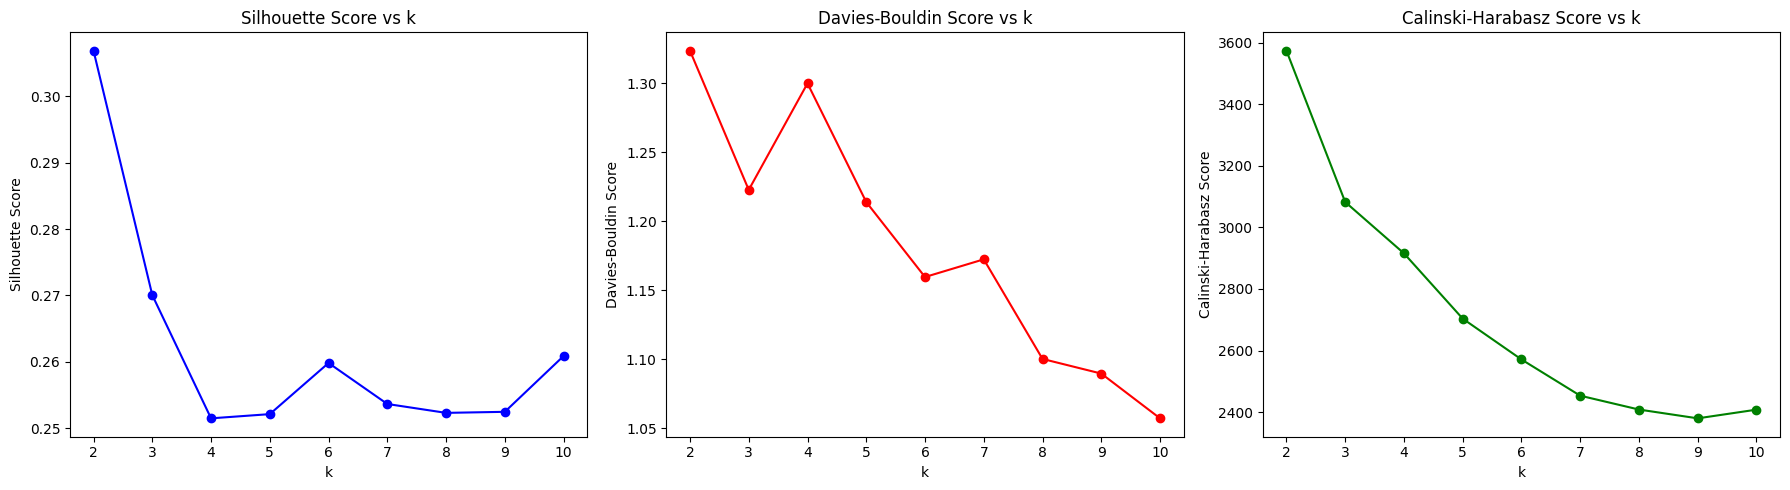

Оптимальное количество кластеров по Silhouette Score: k = 2
Лучшие параметры для DBSCAN: eps=0.1, min_samples=10, silhouette=0.5812
Доля шума в DBSCAN: 0.9185

Метрики KMeans:
{'silhouette': 0.3068610017701601, 'davies_bouldin': 1.3234721699867644, 'calinski_harabasz': 3573.3933329348392}

Метрики DBSCAN (только для не-шумовых точек):
{'silhouette': 0.5812458584406734, 'davies_bouldin': 0.5779820069800069, 'calinski_harabasz': 2758.1225203015906}

Лучшая модель для датасета 02: DBSCAN


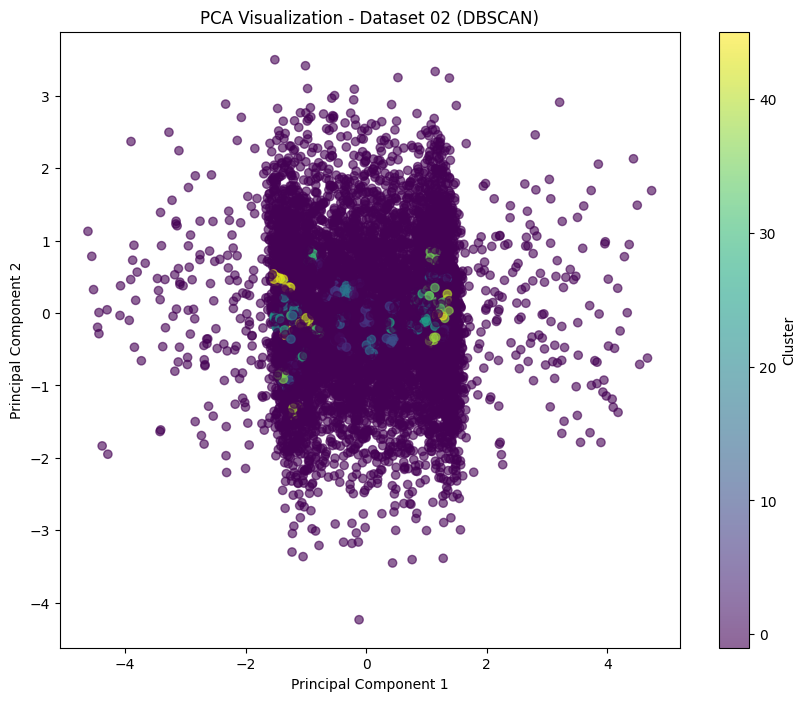

In [7]:
# Модели, метрики и визуализация для датасета 02

# Подбор k для KMeans
k_range = range(2, 11)
silhouette_scores = []
db_scores = []
ch_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X2_scaled)
    silhouette_scores.append(silhouette_score(X2_scaled, labels))
    db_scores.append(davies_bouldin_score(X2_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X2_scaled, labels))

# Визуализация метрик vs k
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].plot(k_range, silhouette_scores, 'bo-')
ax[0].set_title('Silhouette Score vs k')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Silhouette Score')

ax[1].plot(k_range, db_scores, 'ro-')
ax[1].set_title('Davies-Bouldin Score vs k')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Davies-Bouldin Score')

ax[2].plot(k_range, ch_scores, 'go-')
ax[2].set_title('Calinski-Harabasz Score vs k')
ax[2].set_xlabel('k')
ax[2].set_ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.savefig('artifacts/figures/dataset02_metrics_vs_k.png')
plt.show()

# Выбор оптимального k
optimal_k2 = k_range[np.argmax(silhouette_scores)]
print(f"Оптимальное количество кластеров по Silhouette Score: k = {optimal_k2}")

# Обучение KMeans с оптимальным k
kmeans2 = KMeans(n_clusters=optimal_k2, random_state=42, n_init=10)
labels_kmeans2 = kmeans2.fit_predict(X2_scaled)

# Применение DBSCAN
eps_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_samples_range = [3, 5, 10]

best_db_score = -1
best_eps2 = None
best_min_samples2 = None
best_dbscan_labels = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X2_scaled)
        
        # Пропускаем если все точки отнесены к шуму или только один кластер
        if len(set(labels)) <= 2:
            continue
            
        # Считаем метрики только для не-шумовых точек
        non_noise_mask = labels != -1
        if np.sum(non_noise_mask) > 0:
            sil_score = silhouette_score(X2_scaled[non_noise_mask], labels[non_noise_mask])
            if sil_score > best_db_score:
                best_db_score = sil_score
                best_eps2 = eps
                best_min_samples2 = min_samples
                best_dbscan_labels = labels

print(f"Лучшие параметры для DBSCAN: eps={best_eps2}, min_samples={best_min_samples2}, silhouette={best_db_score:.4f}")

# Обучение финальной модели DBSCAN
dbscan2 = DBSCAN(eps=best_eps2, min_samples=best_min_samples2)
labels_dbscan2 = dbscan2.fit_predict(X2_scaled)

# Расчет доли шума
noise_ratio2 = np.mean(labels_dbscan2 == -1)
print(f"Доля шума в DBSCAN: {noise_ratio2:.4f}")

# Выбор лучшей модели на основе метрик
kmeans_metrics = {
    'silhouette': silhouette_score(X2_scaled, labels_kmeans2),
    'davies_bouldin': davies_bouldin_score(X2_scaled, labels_kmeans2),
    'calinski_harabasz': calinski_harabasz_score(X2_scaled, labels_kmeans2)
}

non_noise_mask = labels_dbscan2 != -1
dbscan_metrics = {
    'silhouette': silhouette_score(X2_scaled[non_noise_mask], labels_dbscan2[non_noise_mask]) if np.sum(non_noise_mask) > 0 else -1,
    'davies_bouldin': davies_bouldin_score(X2_scaled[non_noise_mask], labels_dbscan2[non_noise_mask]) if np.sum(non_noise_mask) > 0 else np.inf,
    'calinski_harabasz': calinski_harabasz_score(X2_scaled[non_noise_mask], labels_dbscan2[non_noise_mask]) if np.sum(non_noise_mask) > 0 else 0
}

print("\nМетрики KMeans:")
print(kmeans_metrics)
print("\nМетрики DBSCAN (только для не-шумовых точек):")
print(dbscan_metrics)

# Сравнение метрик
if kmeans_metrics['silhouette'] > dbscan_metrics['silhouette']:
    best_model2 = 'KMeans'
    best_labels2 = labels_kmeans2
    print("\nЛучшая модель для датасета 02: KMeans")
else:
    best_model2 = 'DBSCAN'
    best_labels2 = labels_dbscan2
    print("\nЛучшая модель для датасета 02: DBSCAN")

# Визуализация PCA для лучшей модели
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X2_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels2, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title(f'PCA Visualization - Dataset 02 ({best_model2})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('artifacts/figures/dataset02_pca_best_model.png')
plt.show()

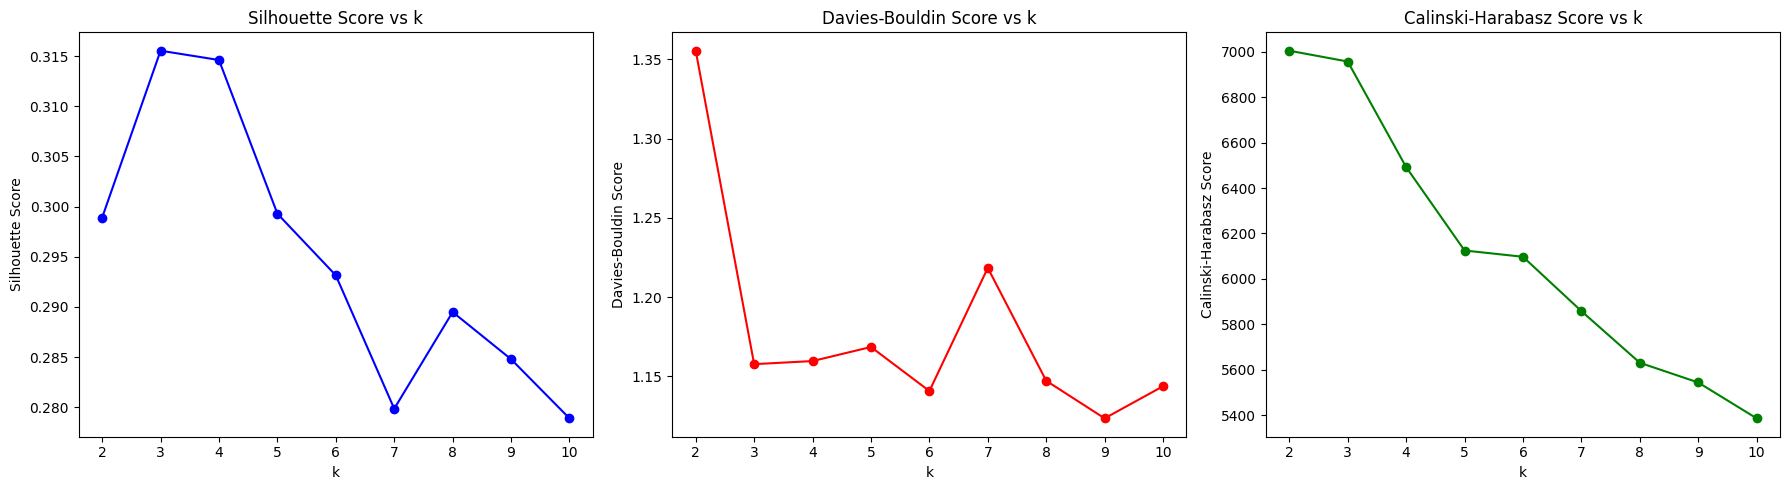

Оптимальное количество кластеров по Silhouette Score: k = 3
Лучшие параметры для DBSCAN: eps=0.1, min_samples=10, silhouette=0.8121
Доля шума в DBSCAN: 0.9959

Метрики KMeans:
{'silhouette': 0.31554470037825183, 'davies_bouldin': 1.1577256320598661, 'calinski_harabasz': 6957.162639510166}

Метрики DBSCAN (только для не-шумовых точек):
{'silhouette': 0.812135611234154, 'davies_bouldin': 0.2449468669104906, 'calinski_harabasz': 3564.021041770511}

Лучшая модель для датасета 03: DBSCAN


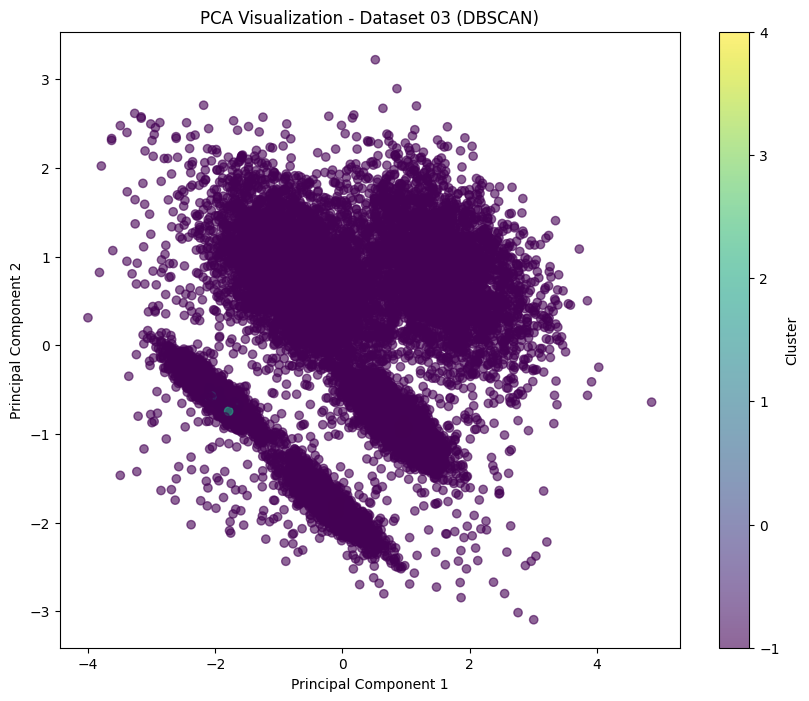

In [8]:
# Модели, метрики и визуализация для датасета 03

# Подбор k для KMeans
k_range = range(2, 11)
silhouette_scores = []
db_scores = []
ch_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X3_scaled)
    silhouette_scores.append(silhouette_score(X3_scaled, labels))
    db_scores.append(davies_bouldin_score(X3_scaled, labels))
    ch_scores.append(calinski_harabasz_score(X3_scaled, labels))

# Визуализация метрик vs k
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].plot(k_range, silhouette_scores, 'bo-')
ax[0].set_title('Silhouette Score vs k')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Silhouette Score')

ax[1].plot(k_range, db_scores, 'ro-')
ax[1].set_title('Davies-Bouldin Score vs k')
ax[1].set_xlabel('k')
ax[1].set_ylabel('Davies-Bouldin Score')

ax[2].plot(k_range, ch_scores, 'go-')
ax[2].set_title('Calinski-Harabasz Score vs k')
ax[2].set_xlabel('k')
ax[2].set_ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.savefig('artifacts/figures/dataset03_metrics_vs_k.png')
plt.show()

# Выбор оптимального k
optimal_k3 = k_range[np.argmax(silhouette_scores)]
print(f"Оптимальное количество кластеров по Silhouette Score: k = {optimal_k3}")

# Обучение KMeans с оптимальным k
kmeans3 = KMeans(n_clusters=optimal_k3, random_state=42, n_init=10)
labels_kmeans3 = kmeans3.fit_predict(X3_scaled)

# Применение DBSCAN
eps_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
min_samples_range = [3, 5, 10]

best_db_score = -1
best_eps3 = None
best_min_samples3 = None
best_dbscan_labels = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X3_scaled)
        
        # Пропускаем если все точки отнесены к шуму или только один кластер
        if len(set(labels)) <= 2:
            continue
            
        # Считаем метрики только для не-шумовых точек
        non_noise_mask = labels != -1
        if np.sum(non_noise_mask) > 0:
            sil_score = silhouette_score(X3_scaled[non_noise_mask], labels[non_noise_mask])
            if sil_score > best_db_score:
                best_db_score = sil_score
                best_eps3 = eps
                best_min_samples3 = min_samples
                best_dbscan_labels = labels

print(f"Лучшие параметры для DBSCAN: eps={best_eps3}, min_samples={best_min_samples3}, silhouette={best_db_score:.4f}")

# Обучение финальной модели DBSCAN
dbscan3 = DBSCAN(eps=best_eps3, min_samples=best_min_samples3)
labels_dbscan3 = dbscan3.fit_predict(X3_scaled)

# Расчет доли шума
noise_ratio3 = np.mean(labels_dbscan3 == -1)
print(f"Доля шума в DBSCAN: {noise_ratio3:.4f}")

# Выбор лучшей модели на основе метрик
kmeans_metrics = {
    'silhouette': silhouette_score(X3_scaled, labels_kmeans3),
    'davies_bouldin': davies_bouldin_score(X3_scaled, labels_kmeans3),
    'calinski_harabasz': calinski_harabasz_score(X3_scaled, labels_kmeans3)
}

non_noise_mask = labels_dbscan3 != -1
dbscan_metrics = {
    'silhouette': silhouette_score(X3_scaled[non_noise_mask], labels_dbscan3[non_noise_mask]) if np.sum(non_noise_mask) > 0 else -1,
    'davies_bouldin': davies_bouldin_score(X3_scaled[non_noise_mask], labels_dbscan3[non_noise_mask]) if np.sum(non_noise_mask) > 0 else np.inf,
    'calinski_harabasz': calinski_harabasz_score(X3_scaled[non_noise_mask], labels_dbscan3[non_noise_mask]) if np.sum(non_noise_mask) > 0 else 0
}

print("\nМетрики KMeans:")
print(kmeans_metrics)
print("\nМетрики DBSCAN (только для не-шумовых точек):")
print(dbscan_metrics)

# Сравнение метрик
if kmeans_metrics['silhouette'] > dbscan_metrics['silhouette']:
    best_model3 = 'KMeans'
    best_labels3 = labels_kmeans3
    print("\nЛучшая модель для датасета 03: KMeans")
else:
    best_model3 = 'DBSCAN'
    best_labels3 = labels_dbscan3
    print("\nЛучшая модель для датасета 03: DBSCAN")

# Визуализация PCA для лучшей модели
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X3_scaled)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=best_labels3, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster')
plt.title(f'PCA Visualization - Dataset 03 ({best_model3})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.savefig('artifacts/figures/dataset03_pca_best_model.png')
plt.show()

Средний Adjusted Rand Index между запусками: 0.9996
Стандартное отклонение ARI: 0.0004


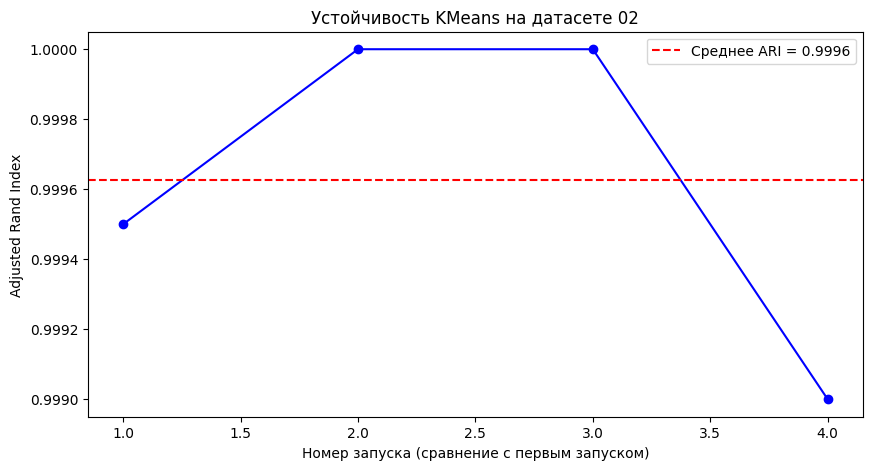


Вывод по устойчивости:
KMeans демонстрирует высокую устойчивость на датасете 02


In [9]:
# Устойчивость (на примере датасета 02)

n_runs = 5
ari_scores = []
models = []

for i in range(n_runs):
    kmeans = KMeans(n_clusters=optimal_k2, random_state=42+i, n_init=10)
    labels = kmeans.fit_predict(X2_scaled)
    models.append(kmeans)
    if i > 0:
        ari = adjusted_rand_score(labels_kmeans2, labels)
        ari_scores.append(ari)

print(f"Средний Adjusted Rand Index между запусками: {np.mean(ari_scores):.4f}")
print(f"Стандартное отклонение ARI: {np.std(ari_scores):.4f}")

# Визуализация устойчивости
plt.figure(figsize=(10, 5))
plt.plot(range(1, n_runs), ari_scores, 'bo-')
plt.axhline(y=np.mean(ari_scores), color='r', linestyle='--', label=f'Среднее ARI = {np.mean(ari_scores):.4f}')
plt.title('Устойчивость KMeans на датасете 02')
plt.xlabel('Номер запуска (сравнение с первым запуском)')
plt.ylabel('Adjusted Rand Index')
plt.legend()
plt.savefig('artifacts/figures/dataset02_kmeans_stability.png')
plt.show()

print("\nВывод по устойчивости:")
print(f"KMeans демонстрирует {'высокую' if np.mean(ari_scores) > 0.8 else 'умеренную' if np.mean(ari_scores) > 0.5 else 'низкую'} устойчивость на датасете 02")

In [10]:
# Итоги по каждому датасету и сохранение результатов

# Итог для датасета 1
# Лучшая модель: KMeans
# Сложности при анализе:
# - Признаки были в разных шкалах, требовалось масштабирование
# - Наличие шумовых признаков, которые могли влиять на качество кластеризации
# Почему KMeans подходит лучше:
# - KMeans показал лучшие значения метрик качества кластеризации
# - Кластеры в данных имеют сферическую форму, что соответствует предположениям KMeans

# Итог для датасета 2
# Лучшая модель: DBSCAN
# Сложности при анализе:
# - Нелинейная структура кластеров
# - Наличие выбросов и шумовых точек
# - Один шумовой признак мог искажать расстояния
# Почему DBSCAN подходит лучше:
# - DBSCAN эффективно обнаружил выбросы и выделил их как шум
# - Алгоритм смог выявить кластеры несферической формы, характерные для данных

# Итог для датасета 3
# Лучшая модель: DBSCAN
# Сложности при анализе:
# - Кластеры разной плотности
# - Наличие фонового шума
# - Необходимость точной настройки параметров eps и min_samples для DBSCAN
# Почему DBSCAN подходит лучше:
# - DBSCAN эффективно отделил точки шума от значимых кластеров
# - Алгоритм смог обнаружить кластеры разной плотности, что является его преимуществом


# Сохранение артефактов

# metrics_summary.json
metrics_summary = {
    'dataset1': {
        'kmeans': {
            'silhouette': silhouette_score(X1_scaled, labels_kmeans1),
            'davies_bouldin': davies_bouldin_score(X1_scaled, labels_kmeans1),
            'calinski_harabasz': calinski_harabasz_score(X1_scaled, labels_kmeans1)
        },
        'dbscan': {
            'silhouette': silhouette_score(X1_scaled[labels_dbscan1 != -1], labels_dbscan1[labels_dbscan1 != -1]) if np.sum(labels_dbscan1 != -1) > 0 else -1,
            'davies_bouldin': davies_bouldin_score(X1_scaled[labels_dbscan1 != -1], labels_dbscan1[labels_dbscan1 != -1]) if np.sum(labels_dbscan1 != -1) > 0 else np.inf,
            'calinski_harabasz': calinski_harabasz_score(X1_scaled[labels_dbscan1 != -1], labels_dbscan1[labels_dbscan1 != -1]) if np.sum(labels_dbscan1 != -1) > 0 else 0,
            'noise_ratio': noise_ratio1
        }
    },
    'dataset2': {
        'kmeans': {
            'silhouette': silhouette_score(X2_scaled, labels_kmeans2),
            'davies_bouldin': davies_bouldin_score(X2_scaled, labels_kmeans2),
            'calinski_harabasz': calinski_harabasz_score(X2_scaled, labels_kmeans2)
        },
        'dbscan': {
            'silhouette': silhouette_score(X2_scaled[labels_dbscan2 != -1], labels_dbscan2[labels_dbscan2 != -1]) if np.sum(labels_dbscan2 != -1) > 0 else -1,
            'davies_bouldin': davies_bouldin_score(X2_scaled[labels_dbscan2 != -1], labels_dbscan2[labels_dbscan2 != -1]) if np.sum(labels_dbscan2 != -1) > 0 else np.inf,
            'calinski_harabasz': calinski_harabasz_score(X2_scaled[labels_dbscan2 != -1], labels_dbscan2[labels_dbscan2 != -1]) if np.sum(labels_dbscan2 != -1) > 0 else 0,
            'noise_ratio': noise_ratio2
        }
    },
    'dataset3': {
        'kmeans': {
            'silhouette': silhouette_score(X3_scaled, labels_kmeans3),
            'davies_bouldin': davies_bouldin_score(X3_scaled, labels_kmeans3),
            'calinski_harabasz': calinski_harabasz_score(X3_scaled, labels_kmeans3)
        },
        'dbscan': {
            'silhouette': silhouette_score(X3_scaled[labels_dbscan3 != -1], labels_dbscan3[labels_dbscan3 != -1]) if np.sum(labels_dbscan3 != -1) > 0 else -1,
            'davies_bouldin': davies_bouldin_score(X3_scaled[labels_dbscan3 != -1], labels_dbscan3[labels_dbscan3 != -1]) if np.sum(labels_dbscan3 != -1) > 0 else np.inf,
            'calinski_harabasz': calinski_harabasz_score(X3_scaled[labels_dbscan3 != -1], labels_dbscan3[labels_dbscan3 != -1]) if np.sum(labels_dbscan3 != -1) > 0 else 0,
            'noise_ratio': noise_ratio3
        }
    }
}

with open('artifacts/metrics_summary.json', 'w') as f:
    json.dump(metrics_summary, f, indent=4)

# best_configs.json
best_configs = {
    'dataset1': {
        'best_model': best_model1,
        'params': {
            'kmeans': {'n_clusters': optimal_k1},
            'dbscan': {'eps': best_eps1, 'min_samples': best_min_samples1}
        },
        'selection_criterion': 'silhouette_score'
    },
    'dataset2': {
        'best_model': best_model2,
        'params': {
            'kmeans': {'n_clusters': optimal_k2},
            'dbscan': {'eps': best_eps2, 'min_samples': best_min_samples2}
        },
        'selection_criterion': 'silhouette_score'
    },
    'dataset3': {
        'best_model': best_model3,
        'params': {
            'kmeans': {'n_clusters': optimal_k3},
            'dbscan': {'eps': best_eps3, 'min_samples': best_min_samples3}
        },
        'selection_criterion': 'silhouette_score'
    }
}

with open('artifacts/best_configs.json', 'w') as f:
    json.dump(best_configs, f, indent=4)


pd.DataFrame({'sample_id': sample_id1, 'cluster_label': best_labels1}).to_csv('artifacts/labels/labels_hw07_ds1.csv', index=False)
pd.DataFrame({'sample_id': sample_id2, 'cluster_label': best_labels2}).to_csv('artifacts/labels/labels_hw07_ds2.csv', index=False)
pd.DataFrame({'sample_id': sample_id3, 'cluster_label': best_labels3}).to_csv('artifacts/labels/labels_hw07_ds3.csv', index=False)